<a href="https://colab.research.google.com/github/Rahul-Malayil/CodSoft/blob/main/project3creitcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                          CREDIT CARD FRAUD DETECTION
                                        
Build a model to detect fraudulent credit card transactions. Use a
 dataset containing information about credit card transactions, and
 experiment with algorithms like Logistic Regression, Decision Trees,
 or Random Forests to classify transactions as fraudulent or
 legitimate.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

Import train and test data

In [2]:
train=pd.read_csv('/content/fraudTrain.csv')
test=pd.read_csv('/content/fraudTest.csv')

In [3]:
train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50596,50596,2019-01-30 11:20:22,4642894980163,fraud_Lockman Ltd,grocery_pos,37.08,Eddie,Mendez,M,1831 Faith View Suite 653,...,40.7491,-95.0380,7297.0,IT trainer,1990-07-13,fdb2014502b4c7b476b1c05aa95be8f0,1.327922e+09,40.539831,-94.772774,0.0
50597,50597,2019-01-30 11:20:26,3502088871723054,fraud_Pacocha-O'Reilly,grocery_pos,26.74,Scott,Martin,M,31472 Cody Place Suite 740,...,39.0298,-77.0793,19054.0,Operations geologist,1976-09-08,851e9699b12685c5f4441c4fd34c5da6,1.327922e+09,38.383734,-77.760825,0.0
50598,50598,2019-01-30 11:23:50,30082025922891,"fraud_Parisian, Schiller and Altenwerth",misc_net,6.01,Kathleen,Thompson,F,199 Patterson Fords Apt. 132,...,26.1184,-81.7361,276002.0,"Pilot, airline",1934-06-23,b43df0ac01d28e4687e26b316743c613,1.327923e+09,25.144182,-81.658560,0.0
50599,50599,2019-01-30 11:25:15,3546897637165774,"fraud_Ruecker, Beer and Collier",shopping_net,3.11,Kayla,Obrien,F,7921 Robert Port Suite 343,...,31.6591,-96.8094,263.0,Barrister,1956-05-30,719db435333f42ec5dd496cdb1c77481,1.327923e+09,31.283346,-97.152849,0.0


In [4]:
test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46665,46665,2020-07-07 03:52:48,3514897282719543,fraud_Huels-Hahn,gas_transport,87.70,Steven,Faulkner,M,841 Cheryl Centers Suite 115,...,42.9580,-77.3083,10717.0,Cytogeneticist,1952-10-13,b2494b697e0693e7389d2434b0e7e981,1.373169e+09,42.486934,-76.892106,0.0
46666,46666,2020-07-07 03:52:49,3540075240003197,fraud_Cartwright-Harris,grocery_pos,34.08,Christian,Johns,M,892 Solis Neck,...,44.4477,-93.4252,5211.0,Chief Strategy Officer,1987-01-27,d68de2f85af3382b02087b6820c6edcf,1.373169e+09,45.166362,-93.417425,0.0
46667,46667,2020-07-07 03:52:52,630425673344,fraud_Mohr Inc,shopping_pos,3.97,Bryan,Miller,M,411 Laurie Fords,...,38.3880,-79.9906,365.0,Special effects artist,1970-03-14,22d90f1c18f828761e690d885e4a27e2,1.373169e+09,37.695241,-80.493070,0.0
46668,46668,2020-07-07 03:53:26,4124536010991657,"fraud_Osinski, Ledner and Leuschke",grocery_pos,71.47,Sydney,Montoya,F,265 Christian Summit Suite 231,...,30.5012,-87.8835,27829.0,"Presenter, broadcasting",1954-07-21,a88d38dcdf3828f5307d23c841a09c18,1.373169e+09,31.436636,-88.106855,0.0


In [5]:
train.shape

(50601, 23)

display info

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50601 entries, 0 to 50600
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             50601 non-null  int64  
 1   trans_date_trans_time  50601 non-null  object 
 2   cc_num                 50601 non-null  int64  
 3   merchant               50601 non-null  object 
 4   category               50601 non-null  object 
 5   amt                    50601 non-null  float64
 6   first                  50601 non-null  object 
 7   last                   50601 non-null  object 
 8   gender                 50601 non-null  object 
 9   street                 50601 non-null  object 
 10  city                   50601 non-null  object 
 11  state                  50601 non-null  object 
 12  zip                    50601 non-null  int64  
 13  lat                    50601 non-null  float64
 14  long                   50600 non-null  float64
 15  ci

In [7]:
train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,50601.000000,5.060100e+04,50601.000000,50601.000000,50601.000000,50600.000000,5.060000e+04,5.060000e+04,50600.000000,50600.000000,50600.000000
mean,25300.000000,4.194606e+17,71.639166,48624.144562,38.530921,-90.187505,8.944111e+04,1.326667e+09,38.532312,-90.190690,0.009111
std,14607.394822,1.312479e+18,148.894633,27008.114706,5.096699,13.919745,3.010694e+05,7.400696e+05,5.127440,13.934001,0.095015
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.040141,-166.670132,0.000000
25%,12650.000000,1.800429e+14,9.750000,25526.000000,34.668900,-96.790900,7.430000e+02,1.326007e+09,34.754728,-96.893008,0.000000
50%,25300.000000,3.519607e+15,47.950000,48088.000000,39.371600,-87.366700,2.456000e+03,1.326637e+09,39.360202,-87.330001,0.000000
75%,37950.000000,4.642255e+15,83.690000,72011.000000,41.846700,-80.065200,2.112500e+04,1.327265e+09,41.920227,-80.122978,0.000000
max,50600.000000,4.992346e+18,11872.210000,99783.000000,65.689900,-67.950300,2.906700e+06,1.327923e+09,66.659242,-66.967742,1.000000


Find the missing values

In [8]:
train.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


Find the percentage of missing values

In [9]:
train.isnull().sum()/len(train)*100

,0
Unnamed: 0,0.000000
trans_date_trans_time,0.000000
cc_num,0.000000
merchant,0.000000
category,0.000000
amt,0.000000
first,0.000000
last,0.000000
gender,0.000000
street,0.000000


Fill null values with 0

In [11]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

                                           DATA VISUALIZATION

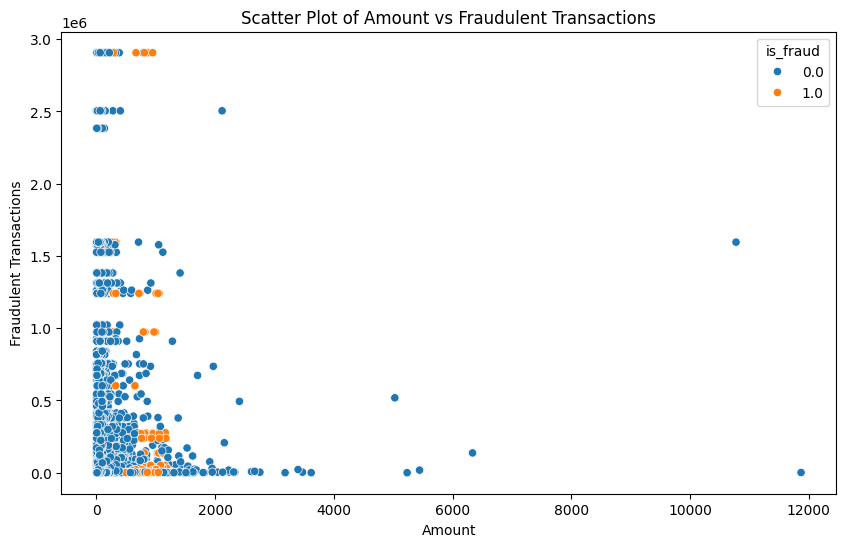

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='amt',y='city_pop',hue='is_fraud',data=train)
plt.title('Scatter Plot of Amount vs Fraudulent Transactions')
plt.xlabel('Amount')
plt.ylabel('Fraudulent Transactions')
plt.show()

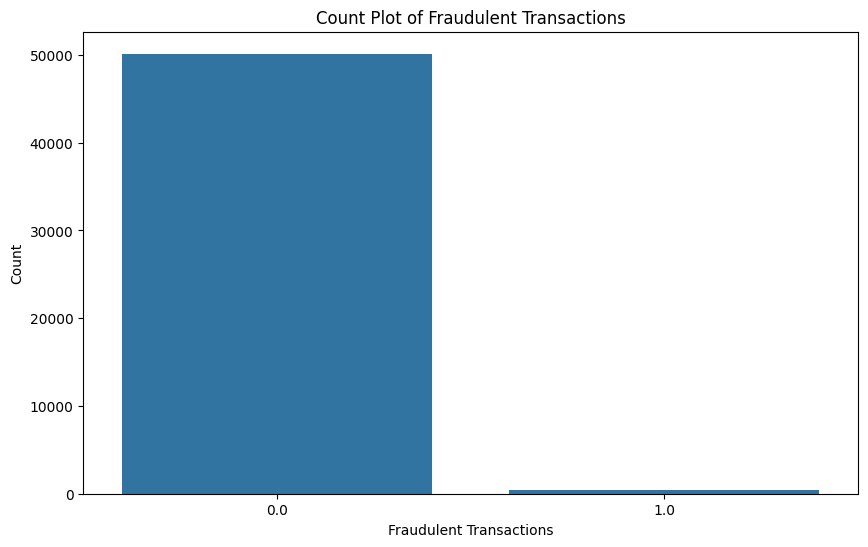

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x='is_fraud',data=train)
plt.title('Count Plot of Fraudulent Transactions')
plt.xlabel('Fraudulent Transactions')
plt.ylabel('Count')
plt.show()

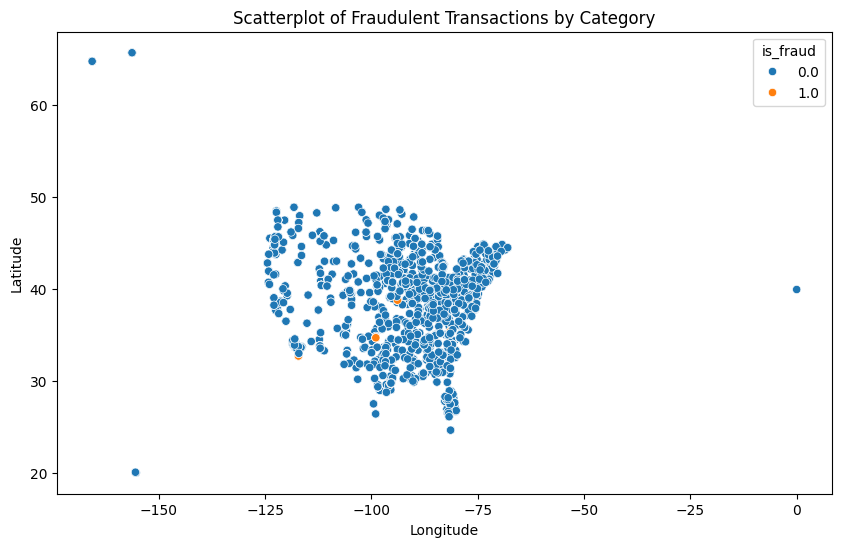

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long',y='lat',hue='is_fraud',data=train)
plt.title('Scatterplot of Fraudulent Transactions by Category')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [18]:
columns_to_scale = ['amt', 'lat', 'long','city_pop', 'unix_time', 'merch_lat', 'merch_long']
columns_to_scale

['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

Perform standard scaling

In [20]:
scaler = StandardScaler()
scaled_training_features = scaler.fit_transform(train[columns_to_scale])

In [24]:
!pip install pandas


Perform label encode datas

In [25]:
import pandas as pd

label_encoder = LabelEncoder()
categorical_columns = ['merchant', 'category', 'gender', 'job','city', 'state', 'street']
for col in categorical_columns:
    # Convert the column to strings before encoding
    train[col] = label_encoder.fit_transform(train[col].astype(str))

Drop unwanted columns

In [26]:
categorical_columns_to_drop = ['Unnamed: 0', 'dob', 'first', 'last', 'trans_num']

In [27]:
train.drop(columns=categorical_columns_to_drop, inplace=True)

Convert trans time to datetime

In [28]:
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])
train['year'] = train['trans_date_trans_time'].dt.year
train['month'] = train['trans_date_trans_time'].dt.month
train['hour'] = train['trans_date_trans_time'].dt.hour
train['minute'] = train['trans_date_trans_time'].dt.minute
train['second'] = train['trans_date_trans_time'].dt.second

In [29]:
train= train.drop('trans_date_trans_time', axis=1)

In [30]:
train

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,job,unix_time,merch_lat,merch_long,is_fraud,year,month,hour,minute,second
0,2703186189652095,404,4,4.97,0,478,439,19,28654,36.0788,...,288,1.325376e+09,36.011293,-82.048315,0.0,2019,1,0,0,18
1,630423337322,67,12,107.23,0,347,522,41,99160,48.8878,...,350,1.325376e+09,49.159047,-118.186462,0.0,2019,1,0,0,44
2,38859492057661,251,0,220.11,1,515,380,4,83252,42.1808,...,219,1.325376e+09,43.150704,-112.154481,0.0,2019,1,0,0,51
3,3534093764340240,214,10,45.00,1,849,790,18,59632,46.2306,...,243,1.325376e+09,47.034331,-112.561071,0.0,2019,1,0,1,16
4,375534208663984,136,5,41.96,1,329,118,39,24433,38.4207,...,16,1.325376e+09,38.674999,-78.632459,0.0,2019,1,0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50596,4642894980163,255,12,37.08,1,74,44,3,51632,40.7491,...,148,1.327922e+09,40.539831,-94.772774,0.0,2019,1,11,20,22
50597,3502088871723054,347,12,26.74,1,222,311,11,20895,39.0298,...,234,1.327922e+09,38.383734,-77.760825,0.0,2019,1,11,20,26
50598,30082025922891,355,4,6.01,0,93,465,48,34112,26.1184,...,256,1.327923e+09,25.144182,-81.658560,0.0,2019,1,11,23,50
50599,3546897637165774,430,7,3.11,0,713,577,37,76678,31.6591,...,368,1.327923e+09,31.283346,-97.152849,0.0,2019,1,11,25,15


Convert the mixed datatypes into one

In [32]:
for col in categorical_columns:
    try:
        test[col] = label_encoder.fit_transform(test[col])
    except TypeError:
        # Check for mixed types in the column
        types = set(type(v) for v in test[col])
        if len(types) > 1:
            print(f"Column '{col}' has mixed types: {types}")
            # Attempt to convert all values to strings
            test[col] = test[col].astype(str)
            test[col] = label_encoder.fit_transform(test[col])

Column 'gender' has mixed types: {<class 'int'>, <class 'str'>}
Column 'job' has mixed types: {<class 'int'>, <class 'str'>}
Column 'city' has mixed types: {<class 'int'>, <class 'str'>}
Column 'state' has mixed types: {<class 'int'>, <class 'str'>}
Column 'street' has mixed types: {<class 'int'>, <class 'str'>}


In [33]:
scaled_testing_features = scaler.fit_transform(test[columns_to_scale])

In [34]:
test.drop(columns=categorical_columns_to_drop, inplace=True)

In [35]:
test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])
test['year'] = test['trans_date_trans_time'].dt.year
test['month'] = test['trans_date_trans_time'].dt.month
test['hour'] = test['trans_date_trans_time'].dt.hour
test['minute'] = test['trans_date_trans_time'].dt.minute
test['second'] = test['trans_date_trans_time'].dt.second

In [36]:
test = test.drop('trans_date_trans_time', axis=1)

In [37]:
test

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,job,unix_time,merch_lat,merch_long,is_fraud,year,month,hour,minute,second
0,2291163933867244,319,10,2.86,2,339,158,40,29209.0,33.9659,...,276,1.371817e+09,33.986391,-81.200714,0.0,2020,6,12,14,25
1,3573030041201292,591,10,29.84,1,352,17,44,84002.0,40.3207,...,392,1.371817e+09,39.450498,-109.960431,0.0,2020,6,12,14,33
2,3598215285024754,611,5,41.28,1,853,62,34,11710.0,40.6729,...,260,1.371817e+09,40.495810,-74.196111,0.0,2020,6,12,14,53
3,3591919803438423,222,9,60.05,2,318,755,9,32780.0,28.5697,...,407,1.371817e+09,28.812398,-80.883061,0.0,2020,6,12,15,15
4,3526826139003047,292,13,3.19,2,543,247,22,49632.0,44.2529,...,197,1.371817e+09,44.959148,-85.884734,0.0,2020,6,12,15,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46665,3514897282719543,272,2,87.70,2,781,248,34,14425.0,42.9580,...,110,1.373169e+09,42.486934,-76.892106,0.0,2020,7,3,52,48
46666,3540075240003197,86,4,34.08,2,821,428,23,55046.0,44.4477,...,74,1.373169e+09,45.166362,-93.417425,0.0,2020,7,3,52,49
46667,630425673344,429,12,3.97,2,396,121,49,24927.0,38.3880,...,414,1.373169e+09,37.695241,-80.493070,0.0,2020,7,3,52,52
46668,4124536010991657,466,4,71.47,1,244,242,2,36532.0,30.5012,...,335,1.373169e+09,31.436636,-88.106855,0.0,2020,7,3,53,26


Split the data into xtrain and ytrain

In [38]:
x_train = train.drop(columns=['is_fraud'])
y_train = train['is_fraud']

In [41]:
X_train

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,city_pop,job,unix_time,merch_lat,merch_long,year,month,hour,minute,second
0,2703186189652095,404,4,4.97,0,478,439,19,28654,36.0788,...,3495.0,288,1.325376e+09,36.011293,-82.048315,2019,1,0,0,18
1,630423337322,67,12,107.23,0,347,522,41,99160,48.8878,...,149.0,350,1.325376e+09,49.159047,-118.186462,2019,1,0,0,44
2,38859492057661,251,0,220.11,1,515,380,4,83252,42.1808,...,4154.0,219,1.325376e+09,43.150704,-112.154481,2019,1,0,0,51
3,3534093764340240,214,10,45.00,1,849,790,18,59632,46.2306,...,1939.0,243,1.325376e+09,47.034331,-112.561071,2019,1,0,1,16
4,375534208663984,136,5,41.96,1,329,118,39,24433,38.4207,...,99.0,16,1.325376e+09,38.674999,-78.632459,2019,1,0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50596,4642894980163,255,12,37.08,1,74,44,3,51632,40.7491,...,7297.0,148,1.327922e+09,40.539831,-94.772774,2019,1,11,20,22
50597,3502088871723054,347,12,26.74,1,222,311,11,20895,39.0298,...,19054.0,234,1.327922e+09,38.383734,-77.760825,2019,1,11,20,26
50598,30082025922891,355,4,6.01,0,93,465,48,34112,26.1184,...,276002.0,256,1.327923e+09,25.144182,-81.658560,2019,1,11,23,50
50599,3546897637165774,430,7,3.11,0,713,577,37,76678,31.6591,...,263.0,368,1.327923e+09,31.283346,-97.152849,2019,1,11,25,15


In [40]:
y_train

,is_fraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
50596,0.0
50597,0.0
50598,0.0
50599,0.0


In [42]:
X_test = test.drop(columns=['is_fraud'])
y_test = test['is_fraud']

In [43]:
X_test

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,city_pop,job,unix_time,merch_lat,merch_long,year,month,hour,minute,second
0,2291163933867244,319,10,2.86,2,339,158,40,29209.0,33.9659,...,333497.0,276,1.371817e+09,33.986391,-81.200714,2020,6,12,14,25
1,3573030041201292,591,10,29.84,1,352,17,44,84002.0,40.3207,...,302.0,392,1.371817e+09,39.450498,-109.960431,2020,6,12,14,33
2,3598215285024754,611,5,41.28,1,853,62,34,11710.0,40.6729,...,34496.0,260,1.371817e+09,40.495810,-74.196111,2020,6,12,14,53
3,3591919803438423,222,9,60.05,2,318,755,9,32780.0,28.5697,...,54767.0,407,1.371817e+09,28.812398,-80.883061,2020,6,12,15,15
4,3526826139003047,292,13,3.19,2,543,247,22,49632.0,44.2529,...,1126.0,197,1.371817e+09,44.959148,-85.884734,2020,6,12,15,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46665,3514897282719543,272,2,87.70,2,781,248,34,14425.0,42.9580,...,10717.0,110,1.373169e+09,42.486934,-76.892106,2020,7,3,52,48
46666,3540075240003197,86,4,34.08,2,821,428,23,55046.0,44.4477,...,5211.0,74,1.373169e+09,45.166362,-93.417425,2020,7,3,52,49
46667,630425673344,429,12,3.97,2,396,121,49,24927.0,38.3880,...,365.0,414,1.373169e+09,37.695241,-80.493070,2020,7,3,52,52
46668,4124536010991657,466,4,71.47,1,244,242,2,36532.0,30.5012,...,27829.0,335,1.373169e+09,31.436636,-88.106855,2020,7,3,53,26


In [44]:
y_test

,is_fraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
46665,0.0
46666,0.0
46667,0.0
46668,0.0


Perform random sampling method

In [46]:
!pip install -q imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
smote = SMOTE(sampling_strategy='auto', random_state=42)
random_undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled_oversmapled, Y_train_resampled_oversmapled = smote.fit_resample(X_train, y_train)
X_train_resampled_Undersampled, Y_train_resampled_Undersampled = random_undersampler.fit_resample(X_train, y_train)

LOGISTICS REGRESSION

In [48]:
from sklearn.linear_model import LogisticRegression # import the LogisticRegression class from the sklearn.linear_model module

logreg = LogisticRegression()

In [50]:
logreg.fit(X_train_resampled_oversmapled, Y_train_resampled_oversmapled)

LogisticRegression()

In [51]:
y_pred = logreg.predict(X_test)

In [52]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [59]:
result_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
result_df

,Actual,Predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
46665,0.0,0.0
46666,0.0,0.0
46667,0.0,0.0
46668,0.0,0.0


RANDOM FOREST CLASSIFIERS

In [54]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()

In [55]:
random_forest.fit(X_train_resampled_oversmapled, Y_train_resampled_oversmapled)

RandomForestClassifier()

In [70]:
y_pred1= random_forest.predict(X_test)

In [71]:
y_pred1

array([0., 0., 0., ..., 0., 0., 0.])

In [75]:
result_df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred1})
result_df1

,Actual,Predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
46665,0.0,0.0
46666,0.0,0.0
46667,0.0,0.0
46668,0.0,0.0


DECISION TREE CLASSIFIER

In [62]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [63]:
decision_tree.fit(X_train_resampled_oversmapled, Y_train_resampled_oversmapled)

DecisionTreeClassifier()

In [76]:
y_pred2=decision_tree.predict(X_test)

In [77]:
y_pred2

array([0., 0., 0., ..., 0., 0., 0.])

In [78]:
result_df2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred2})
result_df2

,Actual,Predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
46665,0.0,0.0
46666,0.0,0.0
46667,0.0,0.0
46668,0.0,0.0


In [68]:
!pip install scikit-learn

Import data visualization to represent accuracy of 3 machine learning techniques

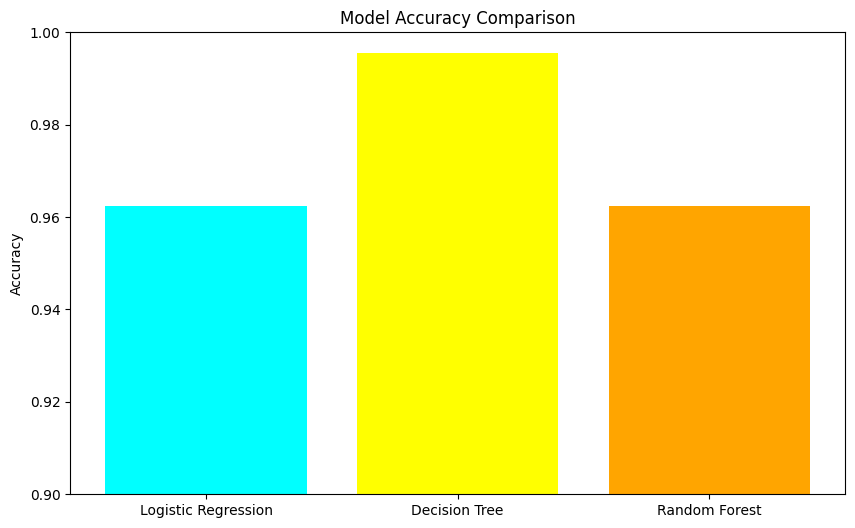

In [79]:

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

accuracies = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred1), accuracy_score(y_test, y_pred2)]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['cyan', 'yellow', 'orange'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim([0.9, 1])
plt.show()